In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline

import math


In [3]:
titanic_data = pd.read_csv("/users/hwing/Downloads/titanic.csv")
titanic_data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


# Analysis Data Set

In [7]:
print (titanic_data.keys())

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')


<AxesSubplot:xlabel='Survived', ylabel='count'>

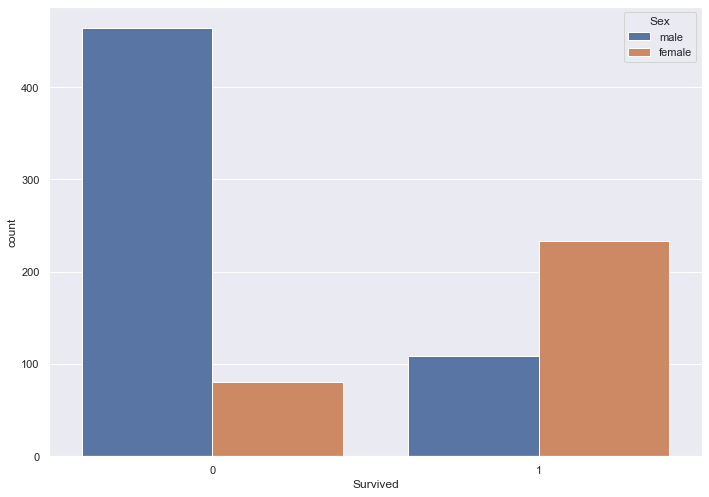

In [9]:
#try hue for p class as well. 
#countplot

sns.countplot(x="Survived", hue = "Sex", data = titanic_data)

<AxesSubplot:ylabel='Frequency'>

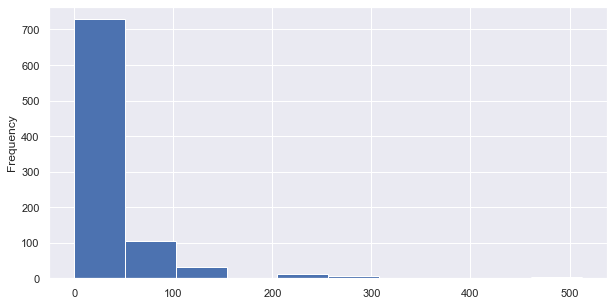

In [10]:
titanic_data["Fare"].plot.hist(figsize=(10,5))

In [11]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


<AxesSubplot:xlabel='Age', ylabel='count'>

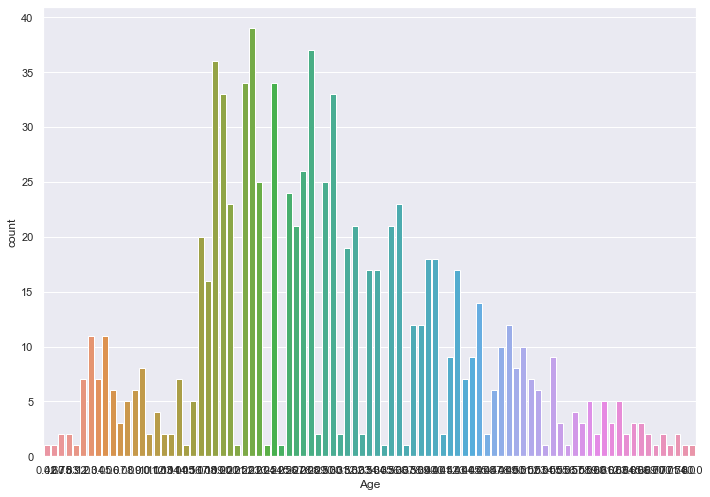

In [12]:
#try for other values

sns.countplot(x = "Age", data = titanic_data)

In [13]:
titanic_data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

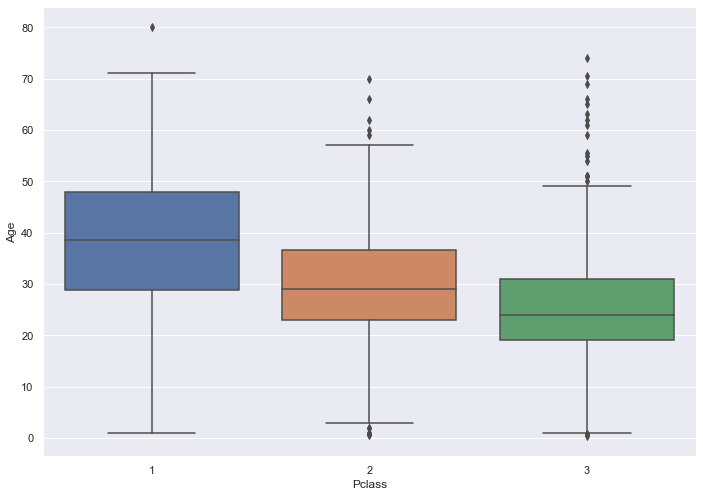

In [14]:
#boxplot

sns.boxplot(x="Pclass", y="Age", data = titanic_data)

#passengers travelling in class 1 & 2 are older

In [15]:
titanic_data.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


<AxesSubplot:>

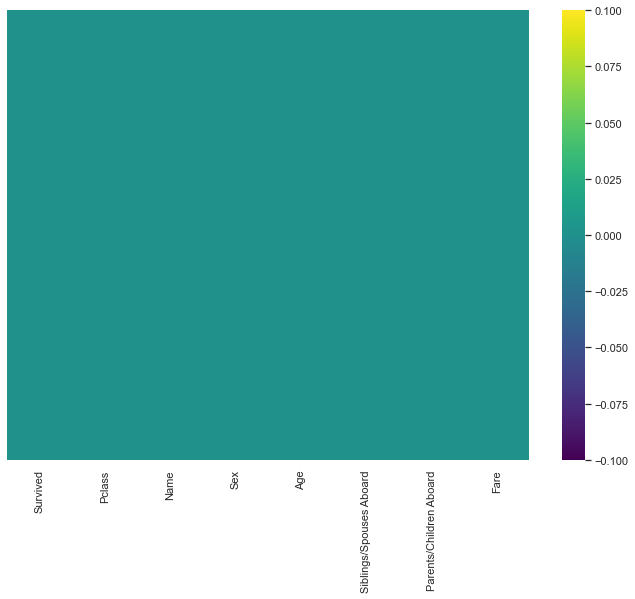

In [16]:
# To drop NA values
# titanic_data.dropna(inplace = True)
# Then check with heat map for any NA values. You can also use cbar(colorbar) = false to remove colots

sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap = 'viridis')

In [20]:
#To check if it is in string or not, and to check different ways remove drop_first=True and test again
#sex = pd.get_dummies(titanic_data['Sex'])

sex = pd.get_dummies(titanic_data['Sex'])
sex.head(5)

#getdummies is important. 

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [22]:
#remove first column using drop_first

sex = pd.get_dummies(titanic_data['Sex'], drop_first= True)
sex.head(5)


,male
0,1
1,0
2,0
3,0
4,1


In [23]:
pcl = pd.get_dummies(titanic_data['Pclass'], drop_first=True)
pcl.head(5)


#if it's two zeros, it means he/she belong to first class

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [24]:
titanic_data = pd.concat([titanic_data, sex, pcl], axis = 1)

In [25]:
titanic_data.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0,0,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0,0,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,0,1


In [26]:
#drop a column to print a data set - name and pclass


titanic_data.drop(['Sex','Pclass','Name'], axis = 1, inplace = True)

# Apply ML Algorithm

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = titanic_data.drop("Survived", axis=1)
Y = titanic_data['Survived']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)


#you can keep changing the test size and check the accuracy - how your model is getting better after changing the values. 

In [46]:
from sklearn.linear_model import LogisticRegression


logmodel - LogisticRegression()
logmodel.fit(X_train, Y_train)

NameError: name 'logmodel' is not defined

In [35]:
predictions = logmodel.predict(X_test)

NameError: name 'logmodel' is not defined

In [36]:
#to test how a model is performing we can trest the accuracy or classification report
#this is method 1

from sklearn.metrics import classification_report

In [37]:
classification_report(y_test,predictions)

NameError: name 'y_test' is not defined

In [38]:
#now we can check confusion matrix and check - Method 2

from sklearn.metrics import confusion_matrix

In [39]:
#Predicted No, Predicted Yes - col1 and col2
#Actual No, Actual Yes - row1 and row2

confusion_matrix(y_test, predictions)

NameError: name 'y_test' is not defined

In [40]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test, predictions)

#the value should be converted to %. 

NameError: name 'y_test' is not defined